EDA

В данном датасете содержится описание симптомов, встречающихся при различных заболеваниях. Кроме того, содержится информация о поле и возрасте больного.

In [157]:
import pandas as pd
import numpy as np
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None


Данные в датасете имеют тип object. Для удобства необходимо поменять его. Преобразуем все столбцы, кроме возраста, в тип string

In [158]:
data['Disease'] = data['Disease'].astype('string')
data['Fever'] = data['Fever'].astype('string')
data['Cough'] = data['Cough'].astype('string')
data['Fatigue'] = data['Fatigue'].astype('string')
data['Difficulty Breathing'] = data['Difficulty Breathing'].astype('string')
data['Gender'] = data['Gender'].astype('string')
data['Fatigue'] = data['Fatigue'].astype('string')
data['Outcome Variable'] = data['Outcome Variable'].astype('string')

Для преобразования столбцов Fever, Cough, Fatigue, Difficulty Breathing нужно убедиться, что они содержат только определенные данные 

Для этого использована библиотека pandera

In [159]:
import pandera as pa
from pandera.api.checks import Check
from pandera import Column

In [160]:
avaliable_values_Yes_No = {"Yes", "No"}
avaliable_values_L_N_H = {"Low", "Normal", "High"}
avaliable_values_P_N = {"Positive", "Negative"}
avaliable_values_gender = {"Female", "Male"}
schema = pa.DataFrameSchema(
    {"Fever": Column(str, Check.isin(avaliable_values_Yes_No)),
     "Cough": Column(str, Check.isin(avaliable_values_Yes_No)),
     "Fatigue": Column(str, Check.isin(avaliable_values_Yes_No)),
     "Difficulty Breathing": Column(str, Check.isin(avaliable_values_Yes_No)),
     "Gender": Column(str, Check.isin(avaliable_values_gender)),
     "Blood Pressure": Column(str, Check.isin(avaliable_values_L_N_H)),
     "Cholesterol Level": Column(str, Check.isin(avaliable_values_L_N_H)),
     "Outcome Variable": Column(str, Check.isin(avaliable_values_P_N))}
)
schema.validate(data)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


Проверка прошла успешно, теперь можно преобразовать переменные

Преобразуем столбцы Fever, Fatigue и Cough: {"Yes": 1, "No": 0}
Gender: {"Male": 1, "Female": 0}
Outcome Variable: {"Negative": 0, "Positive": 1}
Blood Pressure и Cholesterol Level: {"Low": "0", "Normal": "1", "High": "2"}

In [161]:
data['Fever'] = data['Fever'].replace({"Yes": "1", "No": "0"}).astype('int')
data['Cough'] = data['Cough'].replace({"Yes": "1", "No": "0"}).astype('int')
data['Fatigue'] = data['Fatigue'].replace({"Yes": "1", "No": "0"}).astype('int')
data['Difficulty Breathing'] = data['Difficulty Breathing'].replace({"Yes": "1", "No": "0"}).astype('int')
data['Gender'] = data['Gender'].replace({"Male": "1", "Female": "0"}).astype('int')
data['Blood Pressure'] = data['Blood Pressure'].replace({"Low": "0", "Normal": "1", "High": "2"}).astype('int')
data['Cholesterol Level'] = data['Cholesterol Level'].replace({"Low": "0", "Normal": "1", "High": "2"}).astype('int')
data['Outcome Variable'] = data['Outcome Variable'].replace({"Negative": "0", "Positive": "1"}).astype('int')

Список всех заболеваний

In [162]:
print(data['Disease'].unique().tolist())

['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism', 'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes', 'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis', 'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection', 'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine', 'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis', 'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy', 'Colorectal Cancer', 'Hypertensive Heart Disease', 'Multiple Sclerosis', 'Myocardial Infarction (Heart...', 'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia', 'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy', 'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis', 'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)', 'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease', 'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor', 'Cystic Fibrosis', 'Glaucoma', 'Rabies', 'Chickenpox', 'Coronary Artery Disease', 'Eating Disorders (Ano

Графики

Графики построены при помощи библиотек matplotlib и seaborn

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

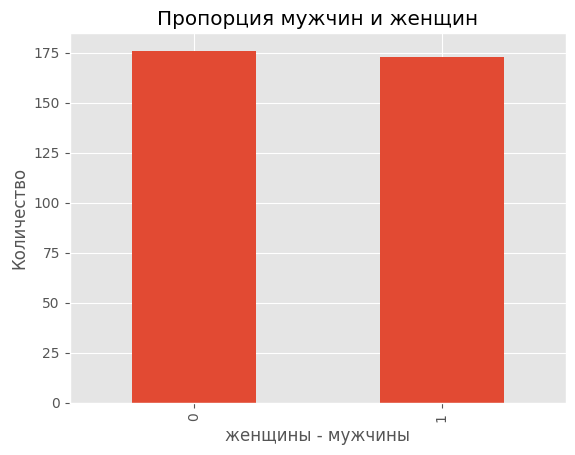

In [164]:
data['Gender'].value_counts().plot(kind='bar').set(title='Пропорция мужчин и женщин', xlabel='женщины - мужчины', ylabel='Количество')
plt.show()

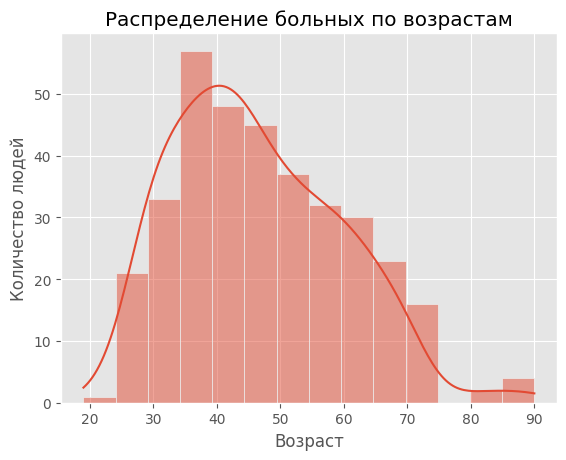

In [165]:
sns.histplot(data['Age'], binwidth=5, kde= True)
plt.title('Распределение больных по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

Количество людей, имеющих определенное заболевание

In [166]:
print(data['Disease'].value_counts())

Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: Int64


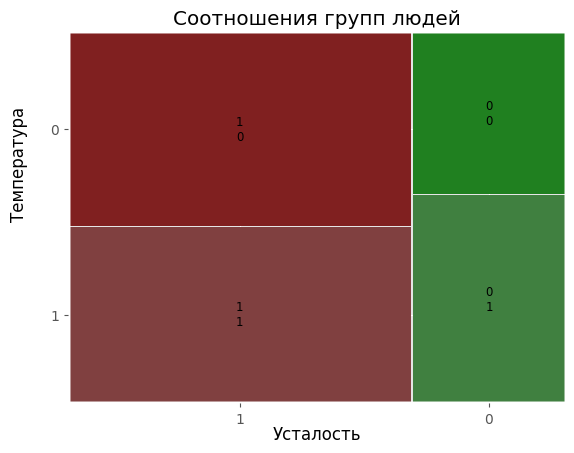

In [167]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['Fatigue','Fever'], title = 'Соотношения групп людей')
plt.text(0.5, -0.1, 'Усталость', ha='center', fontsize=12)
plt.text(-0.1, 0.5, 'Температура', ha='center', rotation=90, fontsize=12)
plt.show()

Из графика можно сделать вывод о том, что усталость проявляется примерно одинакого при наличии и отсутствии температуры.
Кроме того, можно сказать, что большинство больных испытывают усталось

Проверим, как соотносятся между собой кашель и температура

Людей с кашлем и температурой встречается больше, чем людей с кашлем и без температуры

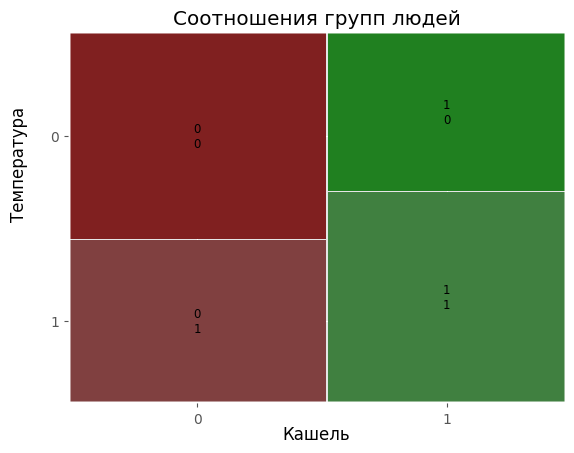

In [168]:
mosaic(data, ['Cough','Fever'], title = 'Соотношения групп людей')
plt.text(0.5, -0.1, 'Кашель', ha='center', fontsize=12)
plt.text(-0.1, 0.5, 'Температура', ha='center', rotation=90, fontsize=12)
plt.show()

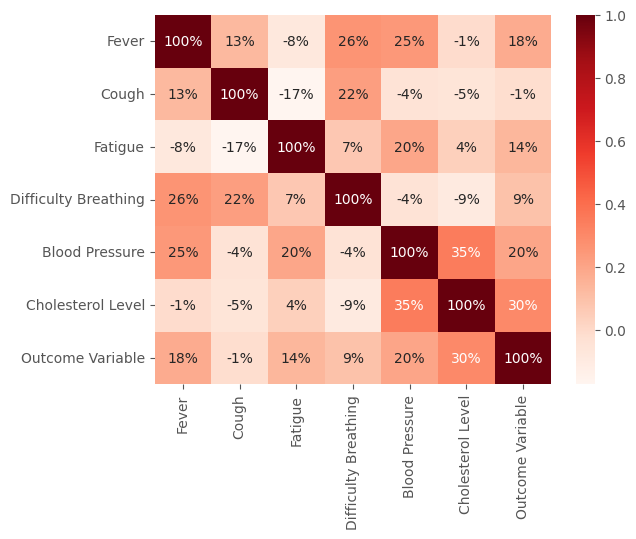

In [169]:
data_connection = data.drop(columns=['Disease', 'Age', 'Gender'])
data_map = data_connection.corr()
sns.heatmap(data_map, annot=True, fmt='.0%', cmap='Reds')
plt.show()

Наибольшая связь заметна между давлением и уровнем холестерина

Проверим, зависит ли давление от возраста

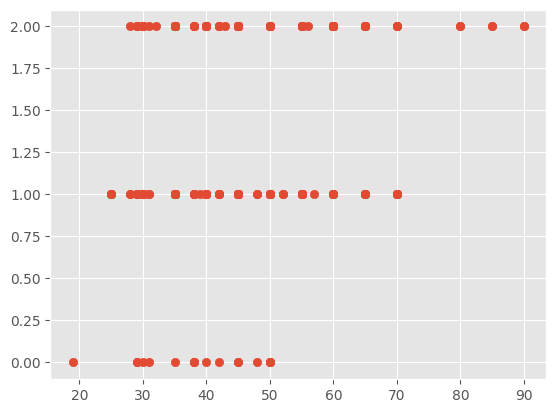

In [170]:
plt.scatter(data['Age'], data['Blood Pressure'])
plt.show()

Проверка гипотез

Проверим гипотезу о том, что чаще встречаются пациенты, ощущающие усталость, чем не ощущающие ее.

Н0: вероятность встретить больного с усталостью и без нее в нашей подборке равна
Н1: вероятность встретить больного с усталостью и без нее в нашей подборке не равна

In [171]:
from scipy.stats import binomtest
bins = data['Fatigue'].value_counts().to_list()
n = bins[0] + bins[1]
k = bins[0]
print( "%.16f" % float(binomtest(n=n, k=k, p=0.5).pvalue))

0.0000000000003752


Получившееся значение p-value < 0.05 => можно отвергнуть нулевую гипотезу

Проверим гипотезу о том, что усталость проявляется примерно одинакого при наличии и отсутствии температуры.

Н0: Усталость проявляется примерно одинакого при наличии и отсутствии температуры
Н1: Проявление усталости зависит от наличия или отсутствия повышенной температуры

In [175]:
contingency_table = pd.crosstab(data['Fever'], data['Fatigue'])

In [176]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)

0.17460626142730445


Значение p-value > 0.05, значит нет оснований отвергать нулевую гипотезу

Проверим гипотезу о том, что людей с кашлем и температурой встречается больше, чем людей без кашля и температуры

Н0: между наличием кашля и наличием температуры нет статистической зависимости
Н1: между наличием кашля и наличием температуры есть статистическая зависимость

In [178]:
cross_table = pd.crosstab(data['Fever'], data['Cough'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(cross_table)
print(p_1)

0.02110066552696619


p-value < 0.05. Можно отвергнуть нулевую гипотезу и принять гипотезу о том, что между кашлем и температурой есть статистическая зависимость

Кластеризация KMeans

Необходимо провести нормализацию данных, чтобы все переменные имели одинаковый вес в процессе анализа.

In [179]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [182]:
features = data[['Fever', 'Fatigue', 'Cough', 'Blood Pressure', 'Cholesterol Level']]
sc = StandardScaler()
X_sc = sc.fit_transform(features)

Теперь необходимо подобрать k 

Это можно сделать с помощью «метода локтя»

RangeIndex(start=0, stop=1, step=1)


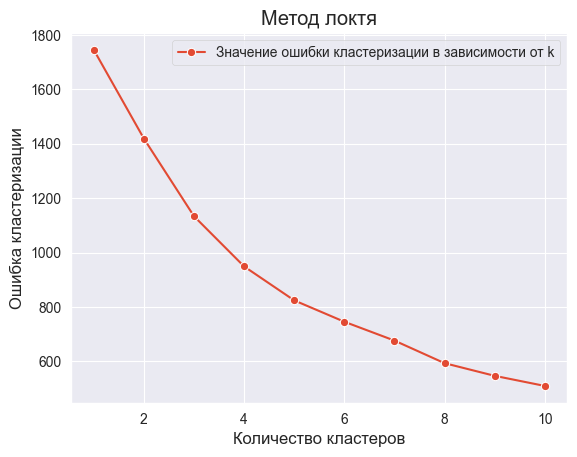

In [205]:
inertia_values = []
k_values = [i for i in range(1, 11)]
for k in range(1, 11):
    k_means = KMeans(k, random_state= 42)
    k_means.fit(X_sc)
    inertia_values.append(k_means.inertia_)

data3 = pd.DataFrame(inertia_values, k_values)
print(data3.columns)
sns.set_style("darkgrid")
sns.lineplot(data = data3, markers='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка кластеризации')
plt.legend(['Значение ошибки кластеризации в зависимости от k'])
plt.title('Метод локтя')
plt.show()

Наиболее подходящее k = 4